<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Checkpoint-2/checkpoint_2_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2
Please execute the code below

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

import re
import plotly.express as px


url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df = pd.read_csv(url)
df.sample(5)

genre      artist_name  ... time_signature valence
15329        Dance         Jessie J  ...            4/4  0.6850
27822        Anime   Shoko Nakagawa  ...            4/4  0.5020
34989        Anime            Rozen  ...            3/4  0.0489
4461       Country  Waylon Jennings  ...            4/4  0.5580
9872   Alternative        Disturbed  ...            4/4  0.0855

[5 rows x 18 columns]

In [2]:
df.shape

(232725, 18)

# Data exploration

## Introduction
Display the first rows of the dataset.

In [ ]:
# Your code here : 
df.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

Describe the dataset including all types of columns (i.e. numerical and the others) and comment the column popularity.

In [ ]:
df.describe(include='all')

genre     artist_name  ... time_signature        valence
count   232725          232725  ...         232725  232725.000000
unique      27           14564  ...              5            NaN
top     Comedy  Giuseppe Verdi  ...            4/4            NaN
freq      9681            1394  ...         200760            NaN
mean       NaN             NaN  ...            NaN       0.454917
std        NaN             NaN  ...            NaN       0.260065
min        NaN             NaN  ...            NaN       0.000000
25%        NaN             NaN  ...            NaN       0.237000
50%        NaN             NaN  ...            NaN       0.444000
75%        NaN             NaN  ...            NaN       0.660000
max        NaN             NaN  ...            NaN       1.000000

[11 rows x 18 columns]

Please check the presence / absence of missing values in each column and comment your result.

In [3]:
print(df.isna().sum())
df.info()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#duplicated by genre, leaving as is for now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

## Some insights about the artists
Give the number of tracks for each artist. The result will be sorted by descending order for a better readability.

In [ ]:
# Your code here : 
df.groupby(['artist_name'])['track_id'].count().sort_values(ascending=False)

artist_name
Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
                          ... 
Rupert Holmes                1
Four Mints                   1
Running Touch                1
Four80East                   1
정진우                          1
Name: track_id, Length: 14564, dtype: int64


Give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [ ]:
df['popularity'].describe()
df.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
df.groupby(['artist_name'])['popularity'].mean().nlargest(3)

artist_name
Pedro Capó        87.0
Mario Bautista    85.0
Mau y Ricky       83.0
Name: popularity, dtype: float64

For the genre 'Pop' only, give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [ ]:
df.genre.value_counts()
df.loc[df['genre']=='Pop'].groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
#by max rating
df.loc[df['genre']=='Pop'].groupby(['artist_name'])['popularity'].max().nlargest(3)
#by mean rating
df.loc[df['genre']=='Pop'].groupby(['artist_name'])['popularity'].mean().nlargest(3)

artist_name
Mabel           91.0
Pedro Capó      87.0
ChocQuibTown    86.0
Name: popularity, dtype: float64

## What about Queen ?
Give the track names of Queen ?

In [ ]:
len(df[df['artist_name']=='Queen']['track_name'].unique())
df[df['artist_name']=='Queen']['track_name']

152988                          We Are The Champions
153284         Get Down, Make Love - Remastered 2011
153622          Sheer Heart Attack - Remastered 2011
153734          Seaside Rendezvous - Remastered 2011
154806    Sleeping On The Sidewalk - Remastered 2011
                             ...                    
225833                            Fat Bottomed Girls
225906          All Dead, All Dead - Remastered 2011
226106                              Somebody To Love
226296      No-One But You (Only The Good Die Young)
226415      Thank God It's Christmas - 2011 Remaster
Name: track_name, Length: 97, dtype: object

What are the mean popularity of all songs from the Queen band ?

What are their 3 most popular songs ?

In [ ]:
print('Mean popularity:',df[df['artist_name']=='Queen']['popularity'].mean())
df[df['artist_name']=='Queen']['popularity'].max()
df[df['artist_name']=='Queen'].sort_values('popularity', ascending=False)[['track_name', 'popularity']][:3]

Mean popularity: 58.79381443298969


track_name  popularity
166058  Bohemian Rhapsody - Remastered 2011          82
166059       Don't Stop Me Now - Remastered          81
166069   Somebody To Love - Remastered 2011          77

## What about Kanye West ?
Give the track names of Kanye West ?

What are the 3 most popular ?

In [ ]:
len(df[df['artist_name']=='Kanye West']['track_name'].unique())
#there appear to be some duplicates listed due to being listed in multi genres
df[df['artist_name']=='Kanye West']['track_name']
df[df['artist_name']=='Kanye West'].sort_values('popularity', ascending=False)[['track_name', 'popularity']][:5]


track_name  popularity
87006   I Love It (& Lil Pump)          87
107939  I Love It (& Lil Pump)          87
87106              Gold Digger          80
108190             Gold Digger          80
108340                   POWER          79

## Transform (apply ?)
Create a new column 'nb_words', with the number of words in each title (track names). It's up to you to choose if punctuation is a word or not.

In [ ]:
#this is sometimes name, mostly not, I will extract 
df[df['track_name'].str.contains('\(')].sample(5)
df['track_name_counts'] = df['track_name'].apply(lambda x: re.sub("\(([^\)]+)\)"," ,",x))

In [ ]:
#majority of punctuation
df['track_name_counts'] = df['track_name_counts'].apply(lambda x: re.sub(r"[-,.;@#?!&$]+\ *", " ", x))

In [ ]:
#close enough for now, but some issues exist
df['track_name_counts'].iloc[[114271, 65672, 128579]]

114271             Country Grammar   
65672           She's Leaving Home   
128579    Requiem K 626  Introitus   
Name: track_name_counts, dtype: object

In [ ]:
df['nb_words'] = df['track_name_counts'].apply(lambda x: len(x.split()))
df.sample(5)[['nb_words', 'track_name_counts', 'track_name']]

nb_words        track_name_counts               track_name
217122         2         Dreamers Highway         Dreamers Highway
209868         3             Shout It Out             Shout It Out
224800         1                Nightrain                Nightrain
21152          2                  Wake Up                  Wake Up
2615           5  Sit Around And Miss You  Sit Around And Miss You

## Pivot table
Let's do a pivot table with genre in lines, key in columns and number of songs in values.

In [ ]:
df.pivot_table(values = 'track_id', index = 'genre', columns='key',  aggfunc = 'nunique')

key                  A   A#    B     C    C#  ...    E     F    F#     G   G#
genre                                         ...                            
A Capella            9   10   10    15     8  ...    6    14     4    15   10
Alternative        865  510  844  1045   972  ...  705   703   727  1024  622
Anime              868  537  658  1041   810  ...  683   855   607  1037  590
Blues             1233  458  610  1175   520  ...  751   801   365  1311  425
Children's Music   495  340  201   979   227  ...  405   614   136   834  230
Children’s Music   905  531  855  1065   965  ...  732   692   730  1004  627
Classical          853  664  440  1112   730  ...  805   901   443  1138  470
Comedy             823  813  647   558  1489  ...  753   802  1238   676  564
Country            927  464  598   946   619  ...  834   607   560  1207  499
Dance              740  537  747  1111   999  ...  570   749   695   922  683
Electronic         842  706  893   861  1368  ...  629   771   714  1035  591
Folk              1057  450  716  1361   601  ...  892   698   491  1140  440
Hip-Hop            692  768  818   853  1770  ...  515   696   667   766  840
Indie              948  518  839  1236   837  ...  775   793   686   974  656
Jazz               782  881  579  1136   846  ...  597  1190   507  1079  688
Movie              705  674  359  1180   478  ...  452   913   297  1015  466
Opera              665  656  381   919   649  ...  705   913   382   862  642
Pop                738  658  802  1067  1205  ...  610   831   699   887  747
R&B                706  643  818   954  1197  ...  549   886   727   826  783
Rap                691  733  821   866  1636  ...  504   729   659   787  826
Reggae            1019  572  791   988   788  ...  675   627   661  1269  513
Reggaeton          871  713  805   821  1153  ...  562   691   787   915  765
Rock              1081  455  711  1183   716  ...  858   697   586  1089  487
Ska               1269  377  737  1285   609  ...  762   527   349  1290  409
Soul               829  678  736  1104   847  ...  601   906   694   905  721
Soundtrack        1054  630  382  1427   556  ...  690   985   307  1352  454
World             1004  550  863  1295   606  ...  770   688   504  1031  411

[27 rows x 12 columns]

## Correlation matrix
Give the correlation matrix for a full understanding of our dataset.

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

# Dataviz

## Display a correlation heatmap.
Color scale has to be center on 0-value, in order to distinguish negative and positive values. Please choose a beautiful diverging palette, and remember to display a title.


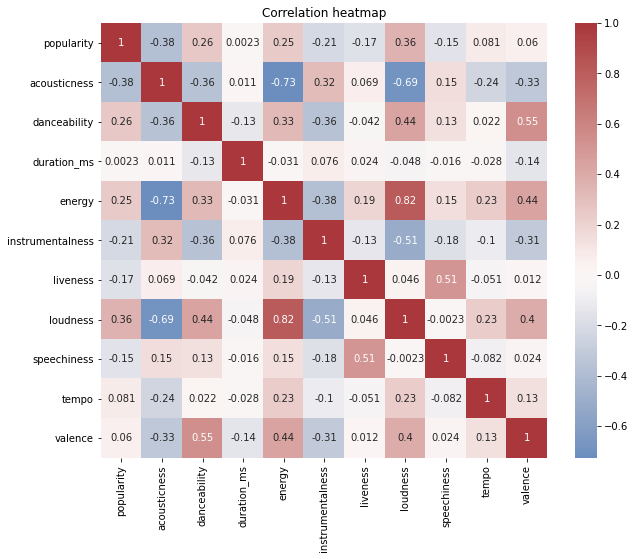

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), 
            cmap = "vlag",
            annot=True,
            center=0)
plt.title('Correlation heatmap')
plt.show()



Some columns seems to have a strong (negative) correlations. 
- Which ones ? 
- What does it means ?

In [6]:
# Your answers here :
print('acousticness:', abs(df.corr()['acousticness']).nlargest(3)[1:])
print()
# print('energy:', abs(df.corr()['energy']).nlargest(2)[1:])

acousticness: energy      0.725576
loudness    0.690202
Name: acousticness, dtype: float64



###Meaning:  
As one value increases the other decreases

## Find the correlation coefficient between Energy and Acousticness

In [7]:
df.corr()['energy']['acousticness']

-0.7255763647090392

## Pairplot
Only for genres Opera and Reggaeton, display a pairplot with different colors for genres (so you'll have 2 colors).

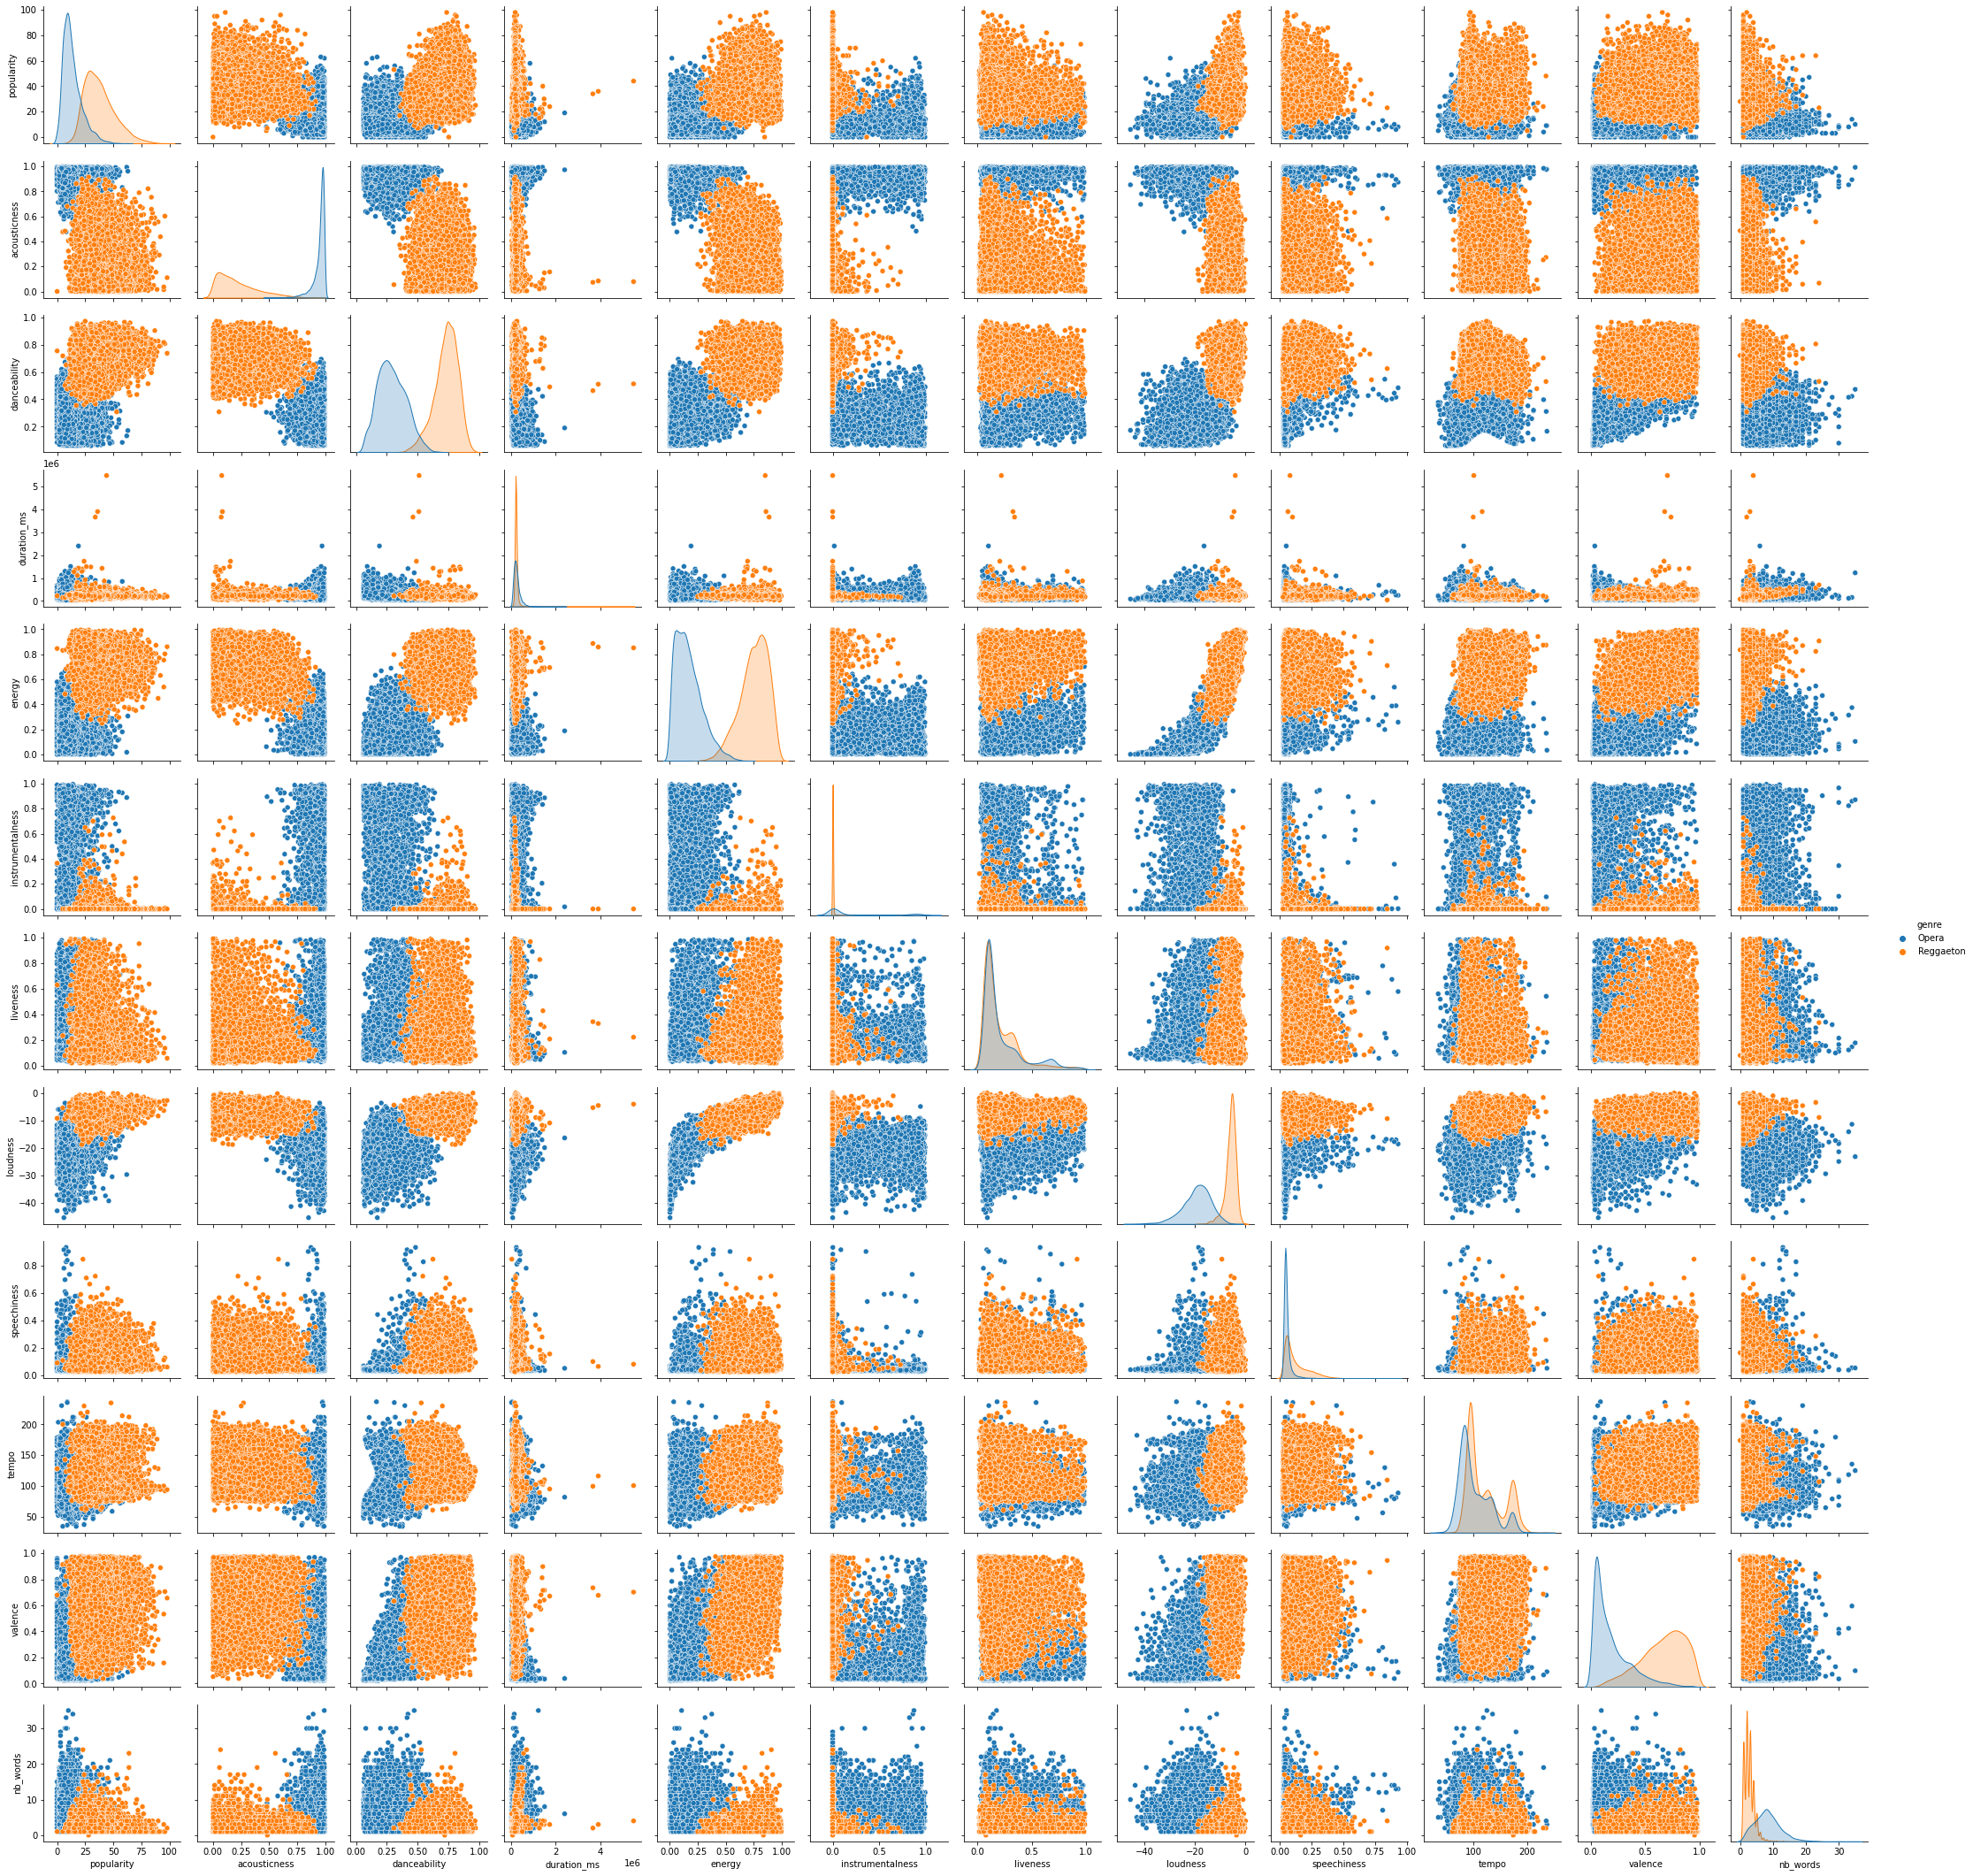

In [ ]:
pp_df = df[(df['genre']=='Opera') | (df['genre']=='Reggaeton')]
sns.pairplot(data=pp_df, hue='genre')

## Scatterplot
Draw a scatterplot on the columns of your choice:
- Filter only on genres Opera and Reggaeton
- Differents colors for genres
- Please choose beautiful colors, and remember to display a title.

Text(0.5, 1.0, 'Acousticness in function of loudness')

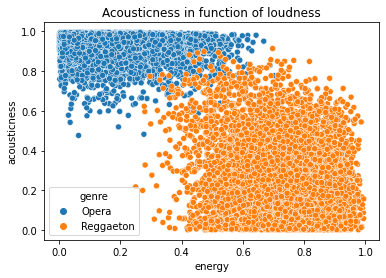

In [8]:
filter = df[(df['genre']=='Opera') | (df['genre']=='Reggaeton')]
sns.scatterplot(x='energy', y='acousticness', data=filter, hue='genre')
plt.title('Acousticness in function of loudness')

## Boxplot
Draw on the same figure 2 boxplots : 1 by genre.
- Boxplots have to be in vertical
- Filter only on genres Opera and Reggaeton
- Your boxplots represent danceability

Your chart must be similar to this one (without the red arrow)

![boxplot](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_boxplot.png)

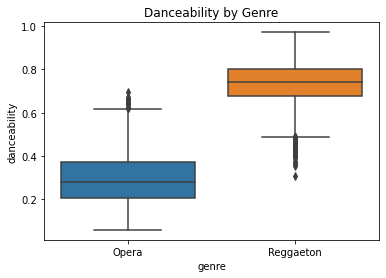

In [10]:
filter = df[(df['genre']=='Opera') | (df['genre']=='Reggaeton')]
sns.boxplot(x = 'genre', y='danceability', data=filter).set_title('Danceability by Genre')
plt.show()


How do we read it ?
- What does the horizontal line near the red arrow represent? What does it mean?

In [ ]:
#The lines represent quantiltes .75 indicated, circles are outliers (1.5*IQR)

## Histogram
Draw a histogram for the distribution of "energy", only for the genre 'Country'

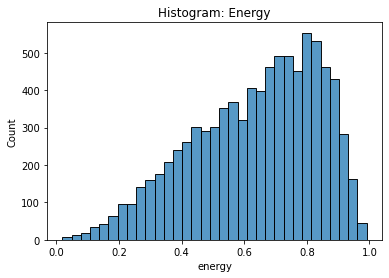

In [ ]:
yee_haw = df[df['genre']=='Country']
sns.histplot(data=yee_haw, x='energy').set_title('Histogram: Energy')
plt.show()

## Comparison between the top 1% popularity and the total dataset
Find a way to compare songs with highest popularity and the others. Something like this example, but you could be creative.

Here we've compared the frequencies by genre (35% of top-songs are "pop", versus 4% of pop songs in the total dataset)


![comparison](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_comparison.png)

##Last thing I was working on, not able to complete in time

<Figure size 1440x1440 with 0 Axes>

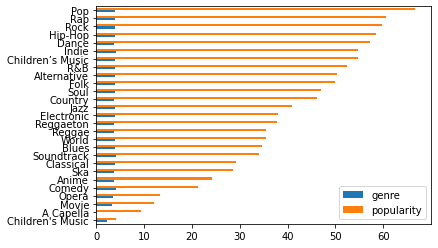

In [ ]:
plt.figure(figsize=(20,20))
percents = df.groupby('genre')['popularity'].mean().to_frame()
categories = df['genre'].value_counts(normalize=True).to_frame()*100
merged_for_plot = pd.concat([categories, percents], axis=1)
merged_for_plot.head()
merged_for_plot.sort_values('popularity', ascending=True).plot(kind='barh')
plt.show()

## Interactive chart
With plotly express, draw an interactive histogram on energy, with a strip by genre.

In [ ]:
fig = px.histogram(df, x='energy', animation_frame='genre',
                 range_x=[0,1], range_y=[0,1300]) 

fig.update_layout(title_text='Energy by genre', title_x=0.5,
                   xaxis_title='Energy',
                   yaxis_title='Genre')

fig.show()

# Machine Learning : Regression
In this part we will try to predict the **"loudness"** of a track. 

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression


import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import numpy as np

In [12]:
df_for_class = df.copy()

In [ ]:
#genre will likely aid in prediciton, adding dummy cols
df.genre.nunique()
df = pd.concat([df, pd.get_dummies(df['genre'])], axis=1)

In [ ]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence',
       'track_name_counts', 'nb_words', 'A Capella', 'Alternative', 'Anime',
       'Blues', 'Children's Music', 'Children’s Music', 'Classical', 'Comedy',
       'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Movie', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock',
       'Ska', 'Soul', 'Soundtrack', 'World'],
      dtype='object')

## Univariate regression
First we will train an univariate linear regression model.

Find the most correlated column with **loudness**.

In [ ]:
abs(df.corr()['loudness']).nlargest(6)[1:]

energy              0.816088
acousticness        0.690202
instrumentalness    0.506320
danceability        0.438668
Classical           0.406297
Name: loudness, dtype: float64

Split your dataset into a train and test set (using 80% as train and 20% as test). 

Use a `random_state` of **1** (for reproductivity sake).

In [ ]:
X = df[['energy']]
y = df['loudness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Now train your model on the train set.

In [ ]:
lm_model = LinearRegression(normalize=True, fit_intercept=True)
lm_model.fit(X_train,y_train)
preds = lm_model.predict(X_test)

And evaluate it on the test set. If you did everything right your score should be `0.6689508695872618`.

In [ ]:
print("Score for the Train dataset : ", lm_model.score(X_train,y_train))
print("Score for the Test dataset : ", lm_model.score(X_test,y_test))

Score for the Train dataset :  0.6652567706815303
Score for the Test dataset :  0.6689508695872618


Visualize your data with a scatter plot (different colors for the train and the test set).

Add a lineplot of the regression.

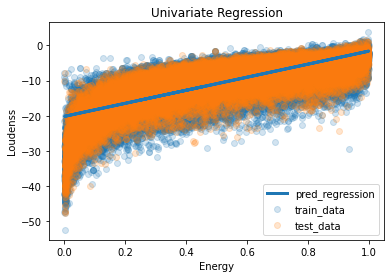

In [ ]:
plt.scatter(X_train['energy'], y_train, alpha=.2, label='train_data')
plt.scatter(X_test['energy'], y_test, alpha=.2, label='test_data')
plt.plot(X_test['energy'], preds, linewidth=3.0, label='pred_regression')
plt.title('Univariate Regression')
plt.xlabel('Energy')
plt.ylabel('Loudenss')
plt.legend()
plt.show()


Print the equation of the regression.

In [ ]:
# Replace a and b by the coefficients
print(f"a * {lm_model.coef_[0]} + {lm_model.intercept_}")

a * 18.56775242436112 + -20.171580657530953


Use two different method to predict the "**loudness**" for a an energy of 0.62.

In [ ]:
energy = .62
print(energy * lm_model.coef_[0] + lm_model.intercept_)
lm_model.predict(np.array([energy]).reshape(-1, 1))


-8.659574154427059


array([-8.65957415])

## Multivariate regression

Now you will predict the **loudness** of a track with all the others numericals columns.

You will do all the needed steps and keep a `random_state` of 1.

Your score should be : `0.7650705916016727`

In [ ]:
#columns =["acousticness", "danceability", "duration_ms", "energy",
#          "instrumentalness", "liveness", "popularity", "speechiness", "tempo", "valence"]


In [ ]:
set(df.dtypes)
cols = df.select_dtypes(['uint8', 'int64', 'float64']).columns
#cols


X = df[cols].drop('loudness', axis=1)
y = df['loudness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
lm_model = LinearRegression(normalize=True, fit_intercept=True)
lm_model.fit(X_train,y_train)
preds = lm_model.predict(X_test)

In [ ]:
print("Score for the Train dataset : ", lm_model.score(X_train,y_train))
print("Score for the Test dataset : ", lm_model.score(X_test,y_test))

Score for the Train dataset :  0.7892174879457091
Score for the Test dataset :  0.7890091000805403


# Classification (bonus question)

Train a classification model that predict the genre of a track with wichever columns and means you want.

Try to get the best accuracy score on your test set!!!

##Scaffolding with a single run through and no experimentation

In [ ]:
#encode key
LE = LabelEncoder()
df_for_class['key'] = LE.fit_transform(df_for_class['key'])
df_for_class['mode'] = LE.fit_transform(df_for_class['mode'])
df_for_class['time_signature'] = LE.fit_transform(df_for_class['time_signature'])

In [ ]:
print(set(df_for_class.dtypes))
cols = df_for_class.select_dtypes(['int64', 'float64']).columns

{dtype('int64'), dtype('O'), dtype('float64')}


In [ ]:
df_for_class.columns, cols

(Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
        'acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
        'speechiness', 'tempo', 'time_signature', 'valence',
        'track_name_counts', 'nb_words'],
       dtype='object'),
 Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
        'speechiness', 'tempo', 'time_signature', 'valence', 'nb_words'],
       dtype='object'))

In [ ]:
scaler = StandardScaler()
X = df_for_class[cols]
X = scaler.fit_transform(X)

y = df_for_class['genre']
y = pd.get_dummies(y).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:
dims = X.shape[1]
cats = y.shape[1]
dims, cats

(15, 27)

In [ ]:
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(dims,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(cats, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
5091/5091 [==============================] - 12s 2ms/step - loss: 0.1005 - accuracy: 0.3841 - val_loss: 0.0951 - val_accuracy: 0.4167
Epoch 2/15
5091/5091 [==============================] - 12s 2ms/step - loss: 0.0948 - accuracy: 0.4167 - val_loss: 0.0931 - val_accuracy: 0.4266
Epoch 3/15
5091/5091 [==============================] - 12s 2ms/step - loss: 0.0931 - accuracy: 0.4269 - val_loss: 0.0916 - val_accuracy: 0.4335
Epoch 4/15
5091/5091 [==============================] - 13s 3ms/step - loss: 0.0922 - accuracy: 0.4308 - val_loss: 0.0912 - val_accuracy: 0.4377
Epoch 5/15
5091/5091 [==============================] - 12s 2ms/step - loss: 0.0915 - accuracy: 0.4358 - val_loss: 0.0904 - val_accuracy: 0.4440
Epoch 6/15
5091/5091 [==============================] - 12s 2ms/step - loss: 0.0911 - accuracy: 0.4377 - val_loss: 0.0904 - val_accuracy: 0.4453
Epoch 7/15
5091/5091 [==============================] - 12s 2ms/step - loss: 0.0907 - accuracy: 0.4407 - val_loss: 0.0899 - val_ac

Initial Run



In [ ]:
print("Evaluate output:", model.evaluate(X_test, y_test))

2182/2182 [==============================] - 2s 918us/step - loss: 0.0893 - accuracy: 0.4502
Evaluate output: [0.08930698782205582, 0.45021340250968933]
